In [3]:
from google.colab import files
import pandas as pd

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Get the file name
file_name = list(uploaded.keys())[0]

Saving medicine_dataset.csv to medicine_dataset (1).csv


In [39]:
df = pd.read_csv(file_name)
df.head()

,Name,Category,Dosage Form,Strength,Manufacturer,Indication,Classification
0,Acetocillin,Antidiabetic,Cream,938 mg,Roche Holding AG,Virus,Over-the-Counter
1,Ibuprocillin,Antiviral,Injection,337 mg,CSL Limited,Infection,Over-the-Counter
2,Dextrophen,Antibiotic,Ointment,333 mg,Johnson & Johnson,Wound,Prescription
3,Clarinazole,Antifungal,Syrup,362 mg,AbbVie Inc.,Pain,Prescription
4,Amoxicillin,Antifungal,Tablet,802 mg,Teva Pharmaceutical Industries Ltd.,Wound,Over-the-Counter


In [40]:
df.tail()

,Name,Category,Dosage Form,Strength,Manufacturer,Indication,Classification
49995,Dextronazole,Analgesic,Ointment,405 mg,Eli Lilly and Company,Pain,Over-the-Counter
49996,Ibuprophen,Antiseptic,Tablet,633 mg,CSL Limited,Pain,Prescription
49997,Dextrovir,Antibiotic,Injection,327 mg,"Gilead Sciences, Inc.",Fever,Over-the-Counter
49998,Dextrostatin,Antibiotic,Inhaler,885 mg,AbbVie Inc.,Wound,Over-the-Counter
49999,Dolomet,Antipyretic,Ointment,426 mg,Teva Pharmaceutical Industries Ltd.,Fever,Over-the-Counter


In [41]:
df.shape

(50000, 7)

In [42]:
df.count()

Name              50000
Category          50000
Dosage Form       50000
Strength          50000
Manufacturer      50000
Indication        50000
Classification    50000
dtype: int64

Checking For Duplicates and Missing Data in the Dataset

In [43]:
df.duplicated().value_counts()

False    50000
Name: count, dtype: int64

This means that we have no duplicates in this dataset

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from scipy.stats import shapiro, ttest_ind, f_oneway

Checking for missing values

In [45]:
missing_values = df.isnull().sum()
missing_values

Name              0
Category          0
Dosage Form       0
Strength          0
Manufacturer      0
Indication        0
Classification    0
dtype: int64

In [46]:
data_types = df.dtypes
data_types

Name              object
Category          object
Dosage Form       object
Strength          object
Manufacturer      object
Indication        object
Classification    object
dtype: object

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            50000 non-null  object
 1   Category        50000 non-null  object
 2   Dosage Form     50000 non-null  object
 3   Strength        50000 non-null  object
 4   Manufacturer    50000 non-null  object
 5   Indication      50000 non-null  object
 6   Classification  50000 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB


In [49]:
df.describe().T

,count,unique,top,freq
Name,50000,64,Metostatin,860
Category,50000,8,Antidepressant,6354
Dosage Form,50000,8,Inhaler,6364
Strength,50000,999,347 mg,77
Manufacturer,50000,20,Boehringer Ingelheim GmbH,2587
Indication,50000,8,Infection,6393
Classification,50000,2,Over-the-Counter,25015


In [50]:
df['Strength'] = df['Strength'].str.replace(' mg', '').astype(int)

df.head()

,Name,Category,Dosage Form,Strength,Manufacturer,Indication,Classification
0,Acetocillin,Antidiabetic,Cream,938,Roche Holding AG,Virus,Over-the-Counter
1,Ibuprocillin,Antiviral,Injection,337,CSL Limited,Infection,Over-the-Counter
2,Dextrophen,Antibiotic,Ointment,333,Johnson & Johnson,Wound,Prescription
3,Clarinazole,Antifungal,Syrup,362,AbbVie Inc.,Pain,Prescription
4,Amoxicillin,Antifungal,Tablet,802,Teva Pharmaceutical Industries Ltd.,Wound,Over-the-Counter


**Here are some common visualizations to might consider:**

Histogram: To visualize the distribution of a numeric column (e.g., Strength).

*   List item
*   List item


Bar Chart: To compare the counts of different categories (e.g., Category, Dosage Form).
Pie Chart: To show the proportion of different categories.
Box Plot: To visualize the distribution and identify outliers in numeric data. *italicized text*

Create visualizations:

Histogram for Strength.

Bar chart for Category.

Pie chart for Dosage Form.

Box plot for Strength.

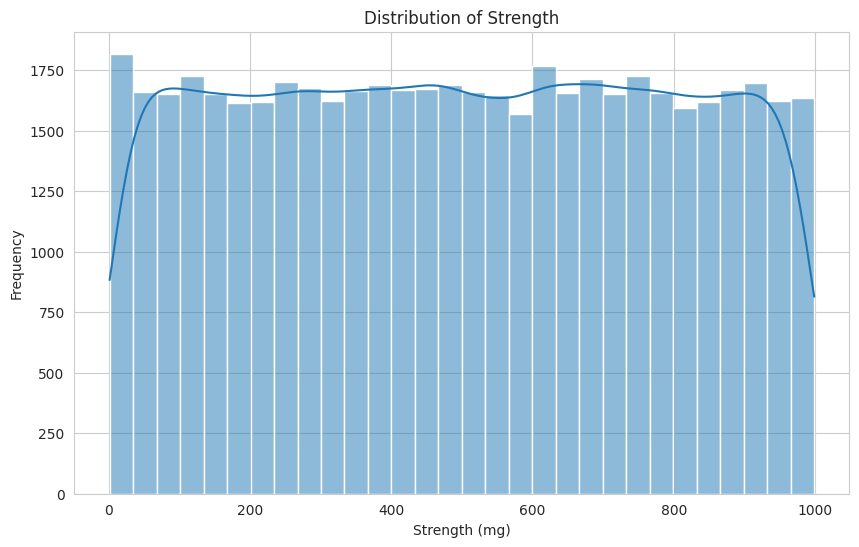

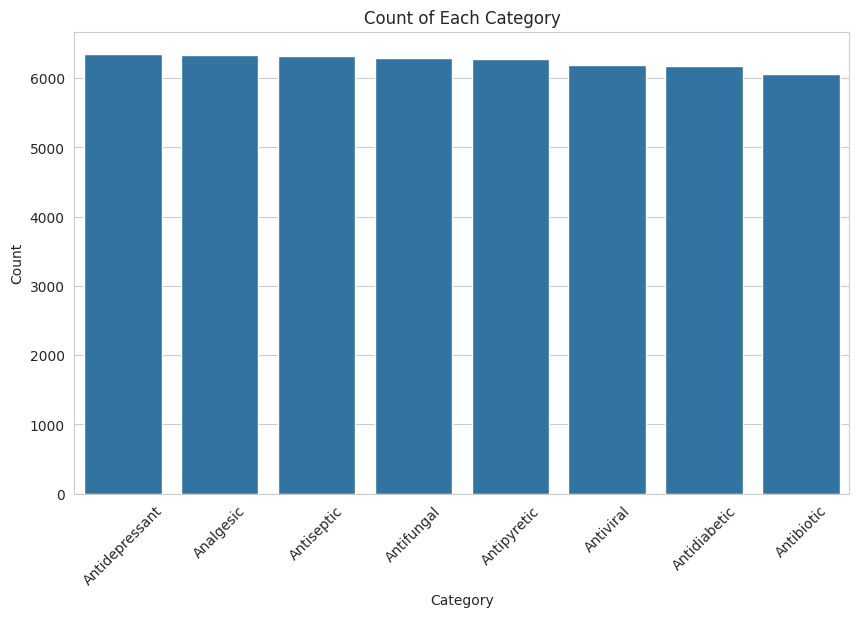

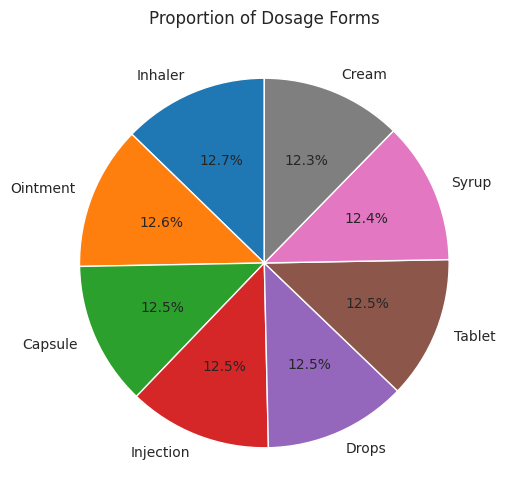

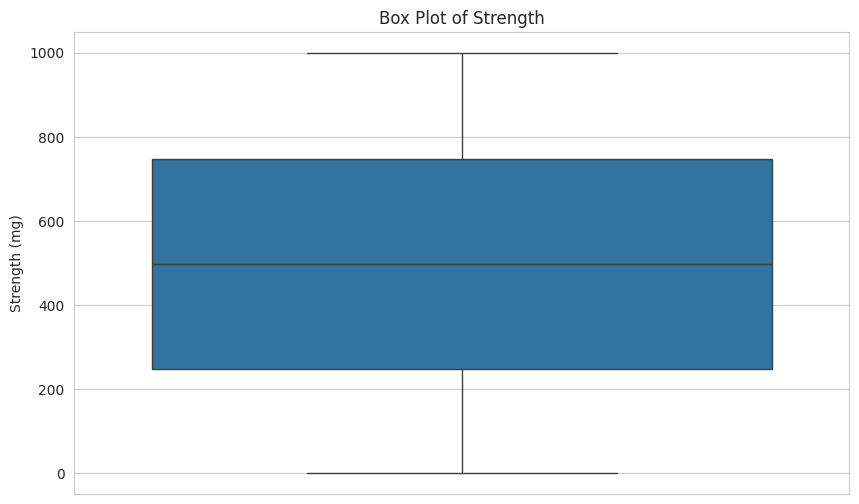

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histogram for 'Strength'
plt.figure(figsize=(10, 6))
sns.histplot(df['Strength'], bins=30, kde=True)
plt.title('Distribution of Strength')
plt.xlabel('Strength (mg)')
plt.ylabel('Frequency')
plt.show()

# Bar chart for 'Category'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Pie chart for 'Dosage Form'
plt.figure(figsize=(10, 6))
df['Dosage Form'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Dosage Forms')
plt.ylabel('')
plt.show()

# Box plot for 'Strength'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Strength')
plt.title('Box Plot of Strength')
plt.ylabel('Strength (mg)')
plt.show()
